### Loading Libraries

In [1]:
import nltk                                
from nltk.corpus import twitter_samples   
import matplotlib.pyplot as plt           
import random   
import numpy as np
import pandas as pd
stopwords=nltk.download('stopwords')
import re                                  
import string                              
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer 
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEEPANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Data Set

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\DEEPANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
#positive and negative tweets 
pos_tweet = twitter_samples.strings('positive_tweets.json')
neg_tweet = twitter_samples.strings('negative_tweets.json')

([<matplotlib.patches.Wedge at 0x28fa307faf0>,
 [Text(-1.1, 1.3471114790620887e-16, 'Positives'),
  Text(1.1, -2.6942229581241775e-16, 'Negative')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.6, -1.4695761589768238e-16, '50.0%')])

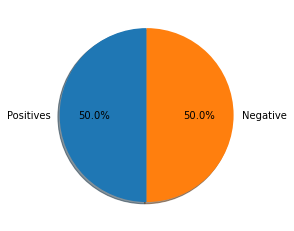

In [4]:
plt.pie([len(pos_tweet), len(neg_tweet)] , labels=['Positives', 'Negative'], autopct='%1.1f%%',
        shadow=True, startangle=90)

#### Example of Positive and Negative Tweet

In [5]:
# print positive in greeen
print('\033[92m' + pos_tweet[random.randint(0,5000)])

# print negative in red
print('\033[91m' + neg_tweet[random.randint(0,5000)])

@Loudahbear you sure f'ing will :)
traffic :-(


### Pre Processing 

#### Cleaning the Tweets

In [6]:
def clean_tweet(tweet_set):
    for index,i in enumerate(tweet_set):
            tweet2=re.sub(r'^RT[\s]+', '', i) #removal of retweets
            # remove hyperlinks
            tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
            # only removing the hash # sign from the word
            tweet_set[index]=re.sub(r'#', '', tweet2)
            
    return (tweet_set)          

In [7]:
neg_tweet=clean_tweet(neg_tweet)
pos_tweet=clean_tweet(pos_tweet)

#### Tokenizing the Tweets

In [8]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tocken(tweet_set):
    for index, item in enumerate(tweet_set):
        tweet_tokens = tokenizer.tokenize(item)
        tweet_set[index]=tweet_tokens  
    return(tweet_set)

In [9]:
pos_tweet=tocken(pos_tweet)
neg_tweet=tocken(neg_tweet)

#### Removing Stop Words

In [10]:
stopwords_english = stopwords.words('english') 

def stop(tweet_set):
    for index,i in enumerate(tweet_set):
        clean=[]
        for word in i:       
            if (word not in stopwords_english and word not in string.punctuation): 
                clean.append(word)
                tweet_set[index]=clean
            
    return (tweet_set)

In [11]:
pos_tweet=stop(pos_tweet)
neg_tweet=stop(neg_tweet)

#### Stemming

In [12]:
stemmer = PorterStemmer() 

def stemm(tweet_set):
    for index, i in enumerate(tweet_set):
        tweets_stem=[]
        for word in i:
            stem_word = stemmer.stem(word)  # stemming word
            tweets_stem.append(stem_word)
        tweet_set[index]=tweets_stem
        
    return (tweet_set)

In [13]:
pos_tweet=stemm(pos_tweet)
neg_tweet=stemm(neg_tweet)

In [14]:
corpus=[]
for i in pos_tweet:
        corpus.append(' '.join(i))
pos=pd.DataFrame(corpus,columns=['Tweets'])
pos['output']=1

In [15]:
corpus=[]
for i in neg_tweet:
        corpus.append(' '.join(i))
neg=pd.DataFrame(corpus,columns=['Tweets'])
neg['output']=0

In [16]:
naive_df=pd.concat([pos,neg],axis=0)

In [17]:
# Alotting the 1 and 0 to positive and negative words respectively

labels = np.append(np.ones((len(pos_tweet))), np.zeros((len(neg_tweet))))

#### Creating the Frequency Table of Words from Positive and Negative Corpus

In [18]:
tweets=pos_tweet+neg_tweet
def frqs(tweet,labels):
    yslist = np.squeeze(labels).tolist()
    print(yslist)
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [19]:
word_frqs=frqs(tweets,labels)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

#### Preparation of Training Set

In [20]:
new_set=[]
for i in tweets:
    for j in i:
        new_set.append(j) 
new_set=list(set(new_set))

#### Creation of Vector

In [21]:
def sub(word):
            dat=[]
            pos = 0
            neg = 0

            if (word, 1) in word_frqs:
                pos = word_frqs[(word, 1)]

            if (word, 0) in word_frqs:
                neg = word_frqs[(word, 0)]

            return(1, pos, neg)


def vect(new_set1):
    datalist = []
    for i in new_set1:
        new=[]
        try:
            datalist.append(sub(i))
        except:
            for j in i:
                new.append(sub(j))
            datalist.append(new)
            
    return (datalist)

In [22]:
data=vect(new_set)

In [23]:
df=pd.DataFrame(data, columns=['Bais','Positive','Negative'])
df['Sentiment']=0
for i in df.index:
    if (df['Positive'][i]>=df['Negative'][i]):
        df['Sentiment'][i]=1
    if df['Positive'][i]<df['Negative'][i]:
        df['Sentiment'][i]=0

In [24]:
X = df[['Bais', 'Positive', 'Negative']].values # Get only the numerical values of the dataframe
Y = df['Sentiment'].values

### Visualisation 

In [25]:
def visualise(key):       
    data=[]
    pos = 0
    neg = 0
    for word in key:
        if (word, 1) in word_frqs:
            pos = word_frqs[(word, 1)]

        if (word, 0) in word_frqs:
            neg = word_frqs[(word, 0)]

        data.append([word, pos, neg])
        
        
    return (data)

def plott(data):

    #Visualisation of words on Log Scale
    fig, ax = plt.subplots(figsize = (8, 8))
    x = np.log([x[1] + 1 for x in data])  
    y = np.log([x[2] + 1 for x in data]) 

    # Plot a dot for each pair of words
    ax.scatter(x, y)  

    # assign axis labels
    plt.xlabel("Log Positive count")
    plt.ylabel("Log Negative count")

    # Add the word as the label at the same position as you added the points just before
    for i in range(0, len(data)):
        ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

    ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
    plt.show()

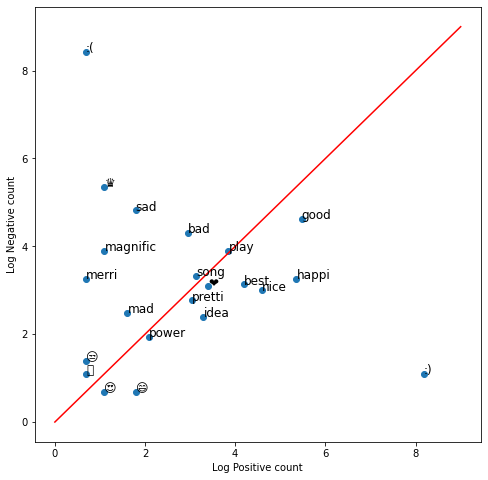

In [26]:
k_list = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
plott(visualise(k_list))

### Initializing The Model And Accuracy

#### Using Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [29]:
pred=lr.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

1.0

#### Using Naive Bayes

In [30]:
cv = CountVectorizer(max_features = 1500)
 
X = cv.fit_transform(naive_df['Tweets']).toarray()
y = naive_df.iloc[:, 1].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
 
classifier = GaussianNB();
classifier.fit(X_train, y_train)
 
# predicting test set results
y_pred = classifier.predict(X_test)
 
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6412

### Model Testing By Logistic Regression

In [33]:
def test_comment(comment):
    
    clean=clean_tweet(comment)
    tockenise=tocken(clean)
    stop_clean=stop(tockenise)
    stemm_clean=stemm(stop_clean)
    
        
    freq_test=vect(stemm_clean)
    
    for i in freq_test:
        test=pd.DataFrame(i, columns=['Bais','Positive','Negative'])
        pred=lr.predict(test)
    if max(list(pred),key = list(pred).count)==1:
        print('\033[92m' + "Positive Comment")
    else:
        print('\033[91m'+"Negative Comment")
        
    for i in stemm_clean:
        plott(visualise(i))

Enter The Comment You Want To Check: I am extremely happy
Positive Comment


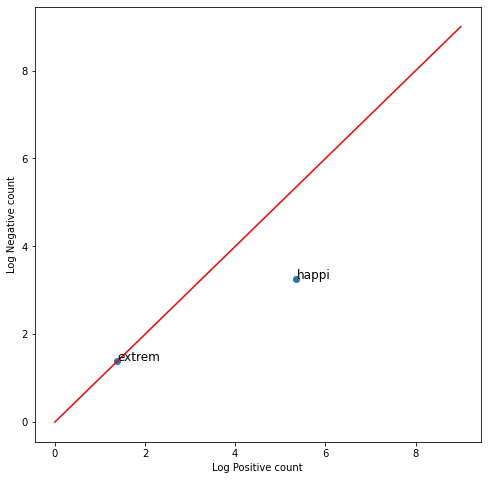

In [34]:
test=[input("Enter The Comment You Want To Check: ")]
test_comment(test)